# XGBoost

## What are they?
- Extreme Gradient Boosting
- Scalable, distributed gradient-boosted decision tree machine learning library
- Allows trees to run in parallel and allows boosting
- Type of supervised machine learning model
- Type of ensemble learning algorithm (similar to random forest, for classification and regression)
    - Ensembly learning algorithms combine multiple ml algorithms to obtain a better model
- XGBoost models utilize bagging (common in random forest models); bagging is the ability to build full decision trees in parallel from random bootstrap samples of the dataset, and the final prediction is an average of all the decision tree predictions
- Bagging in XGBoost models minimize the bias and underfitting 
- Utilizes gradient boosting
    - Gradient boosting is an extention of boosting where the process of additvely generating weak models is formalized as a gradient descent algorithm over an objective function.

# Why XGBoost?
- Usage on a wide range of applications, including solving problems in regression, classification, ranking and user-defined prediction challenges
- Library is highly portable and runs on all desktop platforms
- Cloud integration w/ AWS, Azure and Yarn clusters
- XGBoost runs better with GPUs

# XGBoost vs Random Forest Trees
- Random Forest Trees build many decision trees independently using random samples and averages their predicitons; this reduces overfitting and improves accuracy by combining diverse models
- XGBoost builds trees sequentially, where each tree tries to correct the errors of the previous ones using gradient boosting. It optmizes the model by focusing on hard-to-predict cases and uses advanced techniques for speed and accuracy

# Use Cases
- Credit Scoring:
    - Banks and lenders utilize XGBoost to predict the likelihood that a customer will repay a loan. The model would analyze features like income, credit history, debt, and payment behaviour to assign a risk score. This helps to automate loan approvals as well as set interest rates
- Fraud Detection:
    - Financial institutions use XGBoost to spot suspicious transactions. The model learns from past examples of fraud and normal activity, and it uses specific features like transaction amount, location, time, and account history. It'll easily be able to detect unusual patterns that can indicate fraud, preventing losses

# Code Sample
```
# import required libraries

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# prepare data
df = pd.read_csv('ur_data.csv')
X = df.drop('target_column', axis=1)
y = df['target_column']

import numpy as np
# use random data (for demonstration)
X = np.random.rand(100, 5)
y = np.random.rand(100)

# split data into training and testing splits
X_train, X_test, y_train, y_test = train_test_split

# train XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# make predictions & evaluate performance
preds = model.predict(X_test)
rmse = mean_squared_error(y_test, preds, squared=False)
return rmse
```

# Hyperparameter Tuning
- Tuning hyperparameters helps you get the best performance from your model, and the common parameters to tune include:
    - learning_rate: how much each tree contributes (lower values -> improve accuracy but requires more trees)
    - max_depth: max depth of each tree (controls model complexity)
    - n_estimators: number of trees to build
    - subsample: fraction of samples used for each tree (prevents overfitting)
    - colsample_bytree: fraction of features used for each tree

# In Summary
XGBoost is a powerful, scalable machine learning library for building supervised models (regression, classification, ranking). It uses ensemble learning (combining multiple models) and uses advanced techniques like bagging or gradient boosting to improve accuracy and reduce bias. XGBoost is known to be fast, runs in parallel and works well on many platforms, and it used widely for a variety of prediction tasks



---
# XGBoost Model


<>:29: SyntaxWarning: invalid escape sequence '\.'
<>:29: SyntaxWarning: invalid escape sequence '\.'
C:\Users\gosha\AppData\Local\Temp\ipykernel_27344\2519823977.py:29: SyntaxWarning: invalid escape sequence '\.'
  return pd.to_numeric(colseries.astype(str).str.replace('[^0-9\.]', '', regex=True), errors='coerce')


Loaded 1795 rows with 0 missing injury counts
  POSITION  total_days_out  injury_count
0     PF-C           317.0          24.0
1    SG-SF             0.0           0.0
2     PF-C             0.0           0.0
Players with injury_count > 0: 48.47%
Accuracy: 0.6636971046770601
Classification report:
              precision    recall  f1-score   support

   no injury       0.69      0.62      0.65       231
      injury       0.64      0.71      0.67       218

    accuracy                           0.66       449
   macro avg       0.67      0.67      0.66       449
weighted avg       0.67      0.66      0.66       449



c:\Users\gosha\programming\BALL\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:10:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


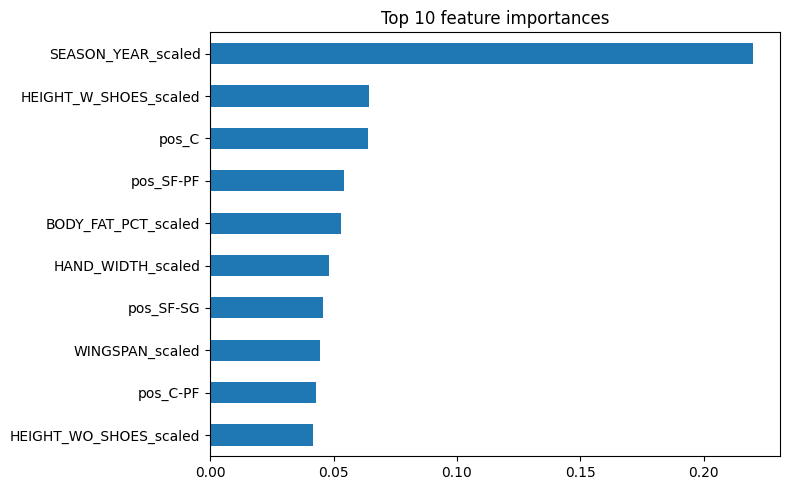

In [ ]:
# required imports

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from matplotlib import pyplot as plt
import sqlite3
import os

# define path to database and load injury profile table
DB_PATH = os.path.abspath(os.path.join(os.getcwd(), '..', 'BALL.db'))
conn = sqlite3.connect(DB_PATH)
query = "SELECT * FROM player_injury_profile"
df = pd.read_sql_query(query, conn)
conn.close()

print(f"Loaded {df.shape[0]} rows with {df['injury_count'].isna().sum()} missing injury counts")
print(df[['POSITION', 'total_days_out', 'injury_count']].head(3))

# create binary target (injured at least once in profile)
df['injury_flag'] = (df['injury_count'] > 0).astype(int)
target_rate = df['injury_flag'].mean()
print(f"Players with injury_count > 0: {target_rate:.2%}")

# numeric columns that need coercion
def coerce(colseries):
    return pd.to_numeric(colseries.astype(str).str.replace('[^0-9\.]', '', regex=True), errors='coerce')

numeric_fields = [
    'HEIGHT_WO_SHOES',
    'HEIGHT_W_SHOES',
    'WEIGHT',
    'WINGSPAN',
    'STANDING_REACH',
    'BODY_FAT_PCT',
    'HAND_LENGTH',
    'HAND_WIDTH',
    'SEASON_YEAR'
]

X_numeric = pd.DataFrame({field: coerce(df[field]) for field in numeric_fields})
X_numeric = X_numeric.fillna(0)

# scale numeric data for better convergence
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_numeric),
    columns=[f + '_scaled' for f in numeric_fields],
    index=df.index
)

# encode position information
position = df['POSITION'].fillna('Unknown')
pos_dummies = pd.get_dummies(position, prefix='pos')

# combine features
X = pd.concat([X_scaled, pos_dummies], axis=1)
y = df['injury_flag']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=150,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification report:')
print(classification_report(y_test, y_pred, target_names=['no injury', 'injury']))

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).sort_values().plot(
    kind='barh', figsize=(8, 5), title='Top 10 feature importances'
)
plt.tight_layout()
plt.show()

In [2]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, show=False)
plt.gcf().set_size_inches(8, 6)
plt.tight_layout()
plt.show()

shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.tight_layout()
plt.show()

c:\Users\gosha\programming\BALL\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

### SHAP analysis
- Call `shap.Explainer` with the trained XGBoost model and the training set so SHAP can learn the baseline expectation and the interaction mechanics the model settled on
- The dot summary plot shows how high/low values for the top features push the prediction toward the "injury" or "no injury" class, letting you spot consistent risk drivers
- The bar summary ranks features by their mean absolute SHAP values, making it easy to report which physical stats the model finds most influential overall